In [168]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [37]:
data = pd.read_excel('Concrete_Data.xls')

In [38]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [39]:
data.shape

(1030, 9)

In [40]:
data.columns = ['cement','blast_furnace_slag','fly_ash','water',
                'superplasticizer','coarse _aggregate','fine_aggregate',
                'age','concrete_compressive_strength']

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse _aggregate              1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [42]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse _aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [46]:
data.skew()

cement                           0.509517
blast_furnace_slag               0.800737
fly_ash                          0.537445
water                            0.074324
superplasticizer                 0.908113
coarse _aggregate               -0.040206
fine_aggregate                  -0.252979
age                              3.269177
concrete_compressive_strength    0.416922
dtype: float64

In [43]:
cor = data.corr()

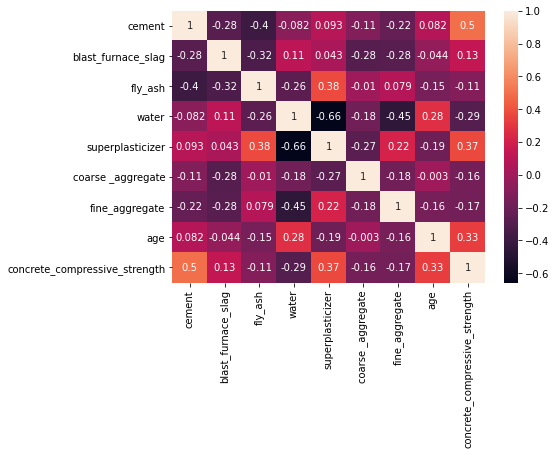

In [44]:
plt.figure(figsize=(7,5))
sns.heatmap(cor,annot=True)
plt.show()

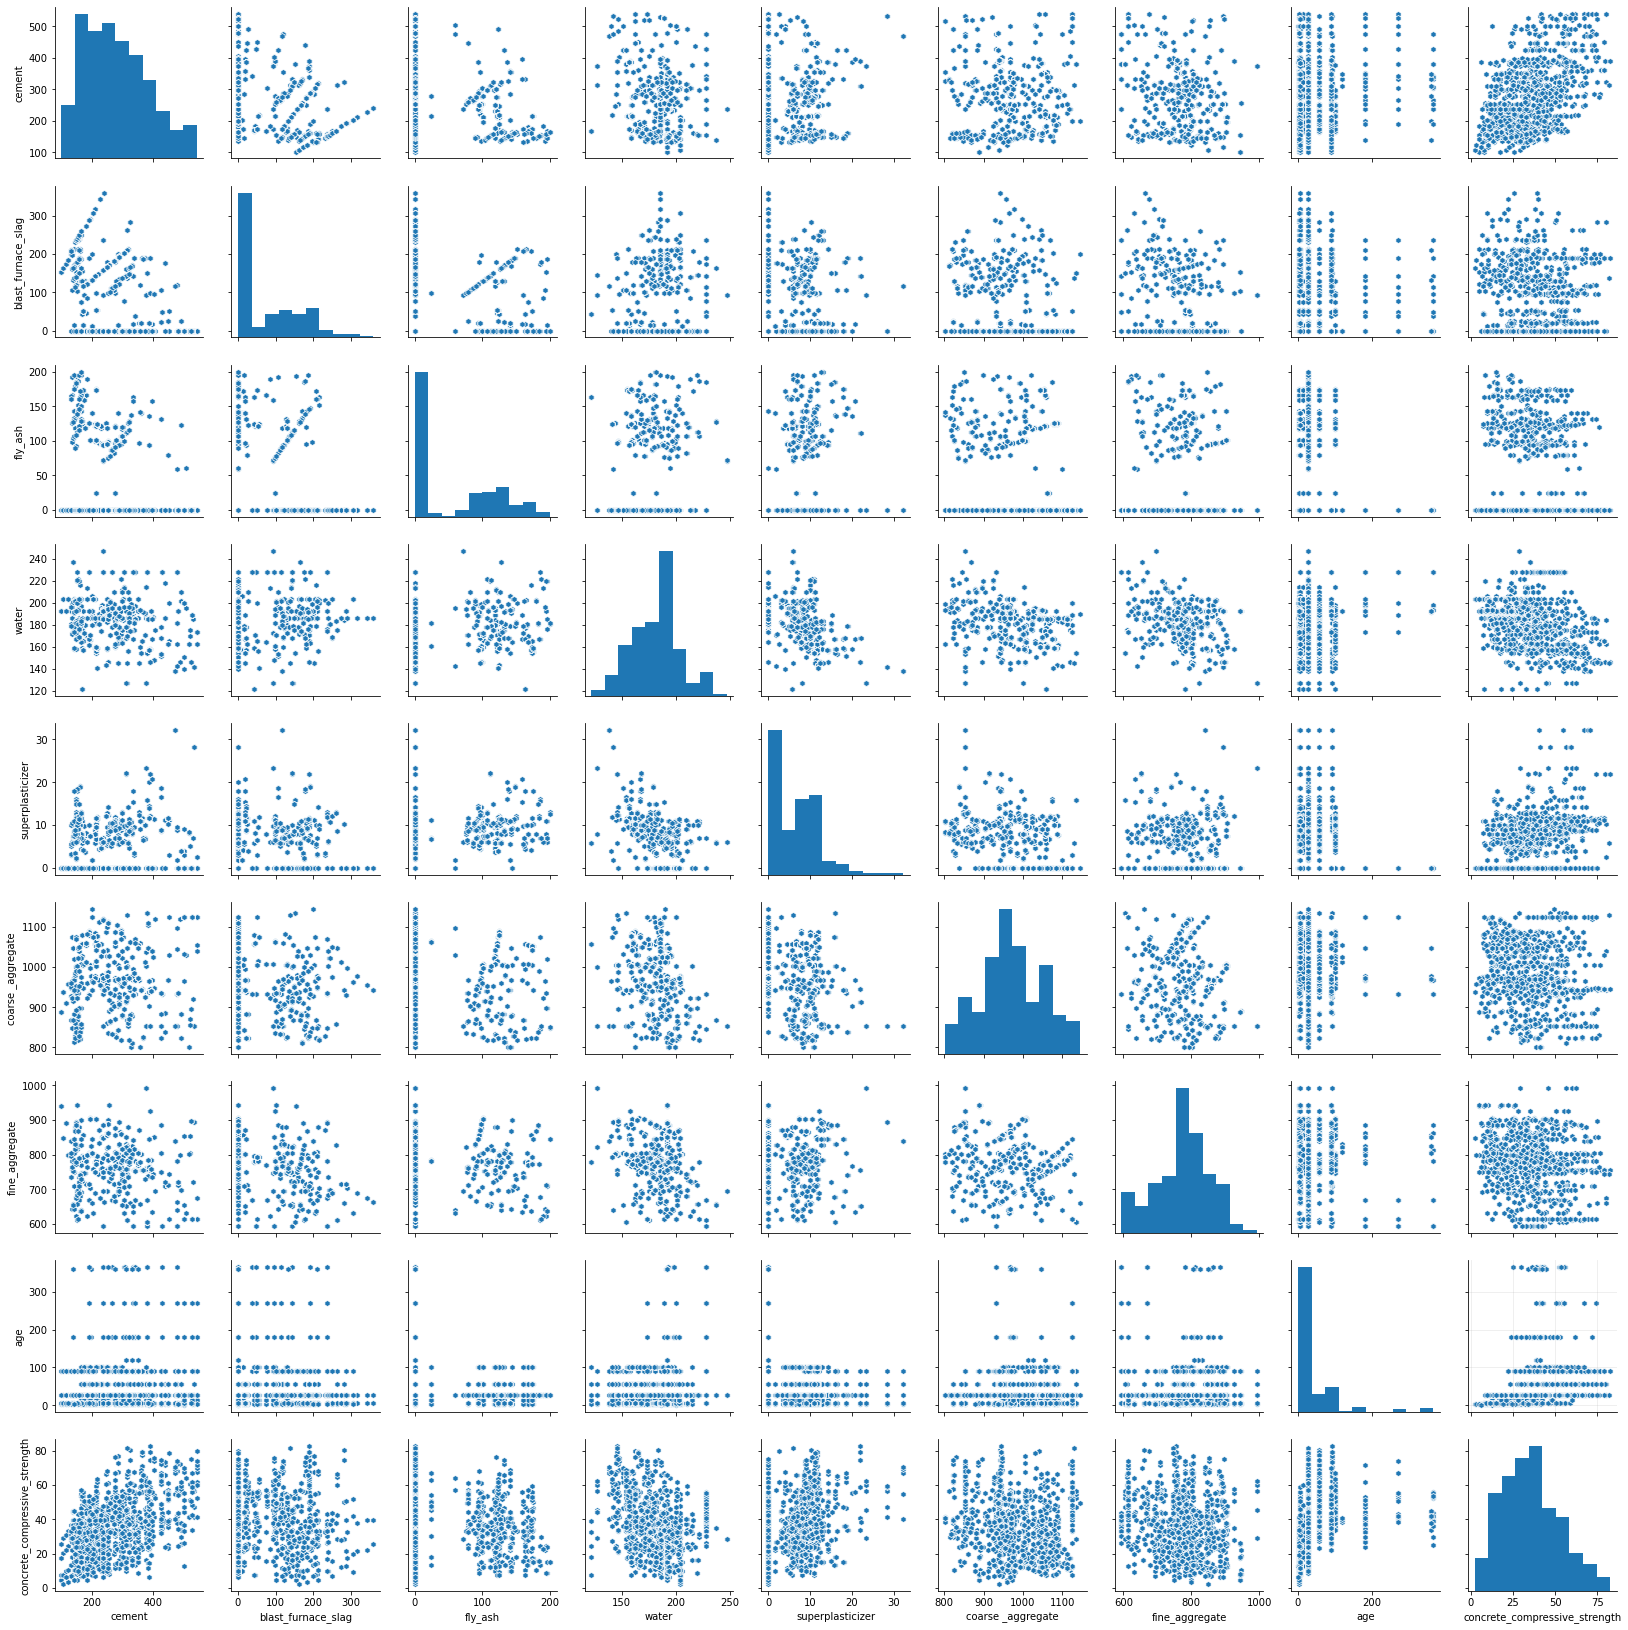

In [109]:
sns.pairplot(data,markers='h')
plt.show()

Text(0.5, 1.0, 'Dist of concrete strength')

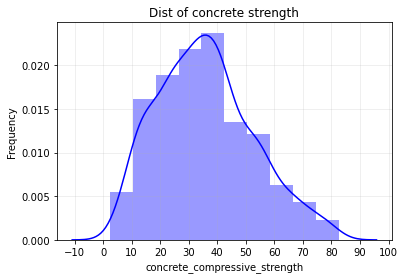

In [108]:
sns.distplot(data.concrete_compressive_strength,bins=10,color='b')
plt.xticks(np.arange(-10,110,10))
plt.ylabel('Frequency')
plt.grid(alpha=0.25)
plt.title('Dist of concrete strength')

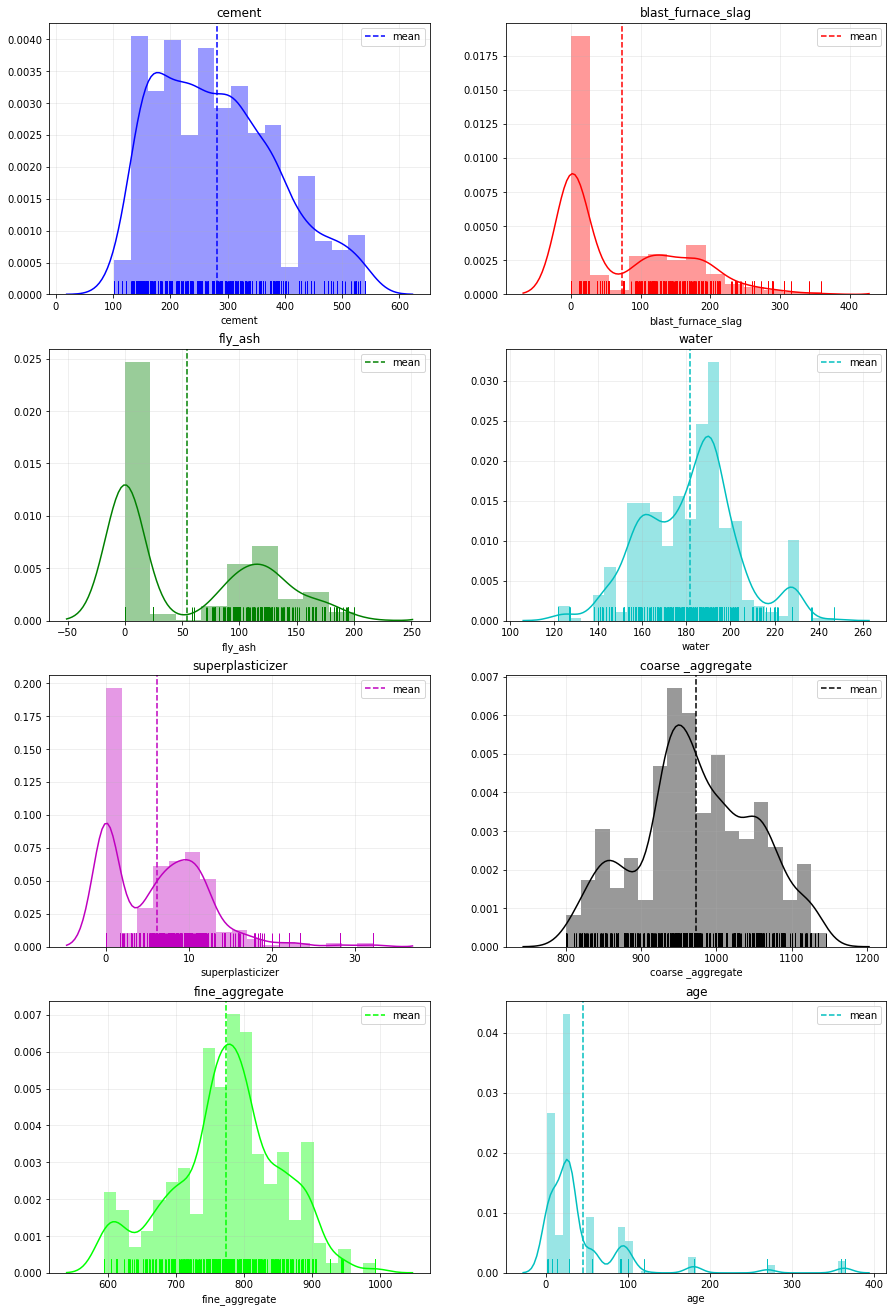

In [107]:
cols = [i for i in data.columns[:-1]]
cc = ['b','r','g','c','m','k','lime','c']
fig = plt.figure(figsize=(15,23))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    ax = sns.distplot(data[cols[i]],color=cc[i],rug=True)
    plt.axvline(data[cols[i]].mean(),linestyle='dashed',label='mean',color=cc[i])
    plt.legend(loc='best')
    plt.grid(alpha=0.25)
    plt.title(cols[i])

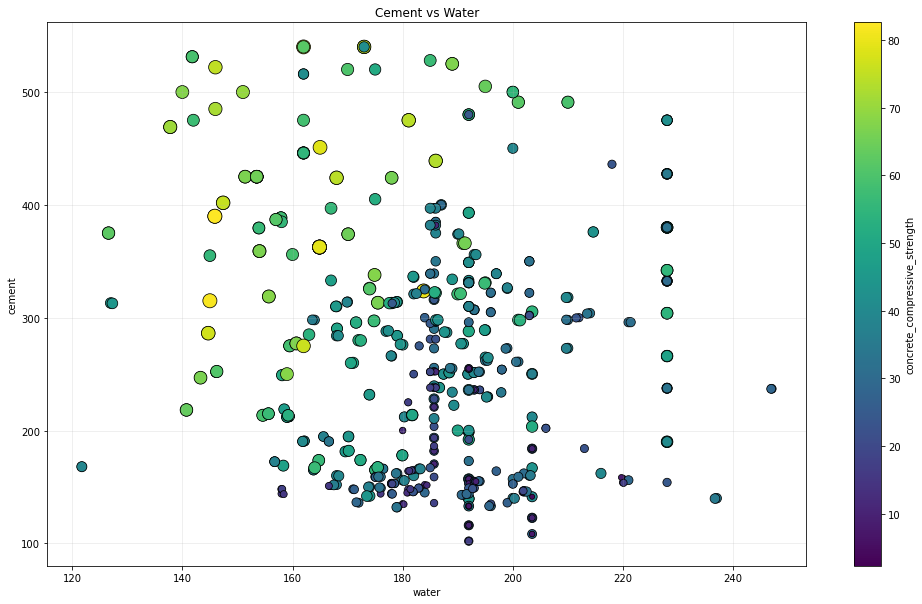

In [195]:
plt.figure(figsize=(17,10))
ax = sns.scatterplot(data['water'],data['cement'],
                     data['concrete_compressive_strength'],
                     size=data['concrete_compressive_strength'],
                     palette='viridis',sizes=(20, 200),edgecolor='k')
norm = plt.Normalize(data['concrete_compressive_strength'].min(),
                     data['concrete_compressive_strength'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
ax.get_legend().remove()
lab = ax.figure.colorbar(sm)
lab.set_label('concrete_compressive_strength')
plt.grid(alpha=0.25)
plt.title('Cement vs Water')
plt.show()

In [225]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [226]:
x.shape

(1030, 8)

In [227]:
x.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse _aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [228]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: concrete_compressive_strength, dtype: float64

In [257]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=.3,random_state=0)

In [258]:
lm = LinearRegression()
lm.fit(x_train,y_train)
pred = lm.predict(x_test)
lrac = lm.score(x_test,y_test)
lrrmse = np.sqrt(mean_squared_error(y_test,pred))
print('Training accuracy : ',lm.score(x_train,y_train))
print('Testing accuracy : ',lm.score(x_test,y_test))
print('Mean absolute error : ',mean_absolute_error(y_test,pred))
print('Mean squared error : ',mean_squared_error(y_test,pred))
print('Root mean squared error : ',np.sqrt(mean_squared_error(y_test,pred)))

Training accuracy :  0.6065944982343784
Testing accuracy :  0.6352770903464131
Mean absolute error :  7.775828411187656
Mean squared error :  93.62436432974661
Root mean squared error :  9.675968392349501


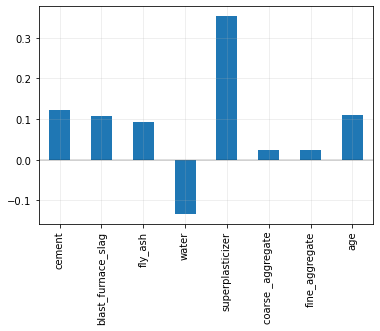

In [259]:
c = pd.DataFrame(lm.coef_.ravel(),index=data.columns[:-1])
ax = c.plot.bar()
ax.axhline(0, color="k",linewidth=0.25)
plt.legend().remove()
plt.grid(alpha=0.25)
plt.show()

In [260]:
ls = Lasso(alpha=0.1)
ls.fit(x_train,y_train)
pred = ls.predict(x_test)
lsac = ls.score(x_test,y_test)
lsrmse = np.sqrt(mean_squared_error(y_test,pred))
print('Training accuracy : ',ls.score(x_train,y_train))
print('Testing accuracy : ',ls.score(x_test,y_test))
print('Mean absolute error : ',mean_absolute_error(y_test,pred))
print('Mean squared error : ',mean_squared_error(y_test,pred))
print('Root mean squared error : ',np.sqrt(mean_squared_error(y_test,pred)))

Training accuracy :  0.6065923948989009
Testing accuracy :  0.6354398603252636
Mean absolute error :  7.773632103058851
Mean squared error :  93.58258127911152
Root mean squared error :  9.673809036729613


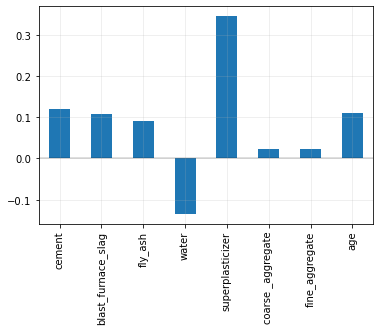

In [261]:
c = pd.DataFrame(ls.coef_.ravel(),index=data.columns[:-1])
ax = c.plot.bar()
ax.axhline(0, color="k",linewidth=0.25)
plt.legend().remove()
plt.grid(alpha=0.25)
plt.show()

In [262]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
knnac = knn.score(x_test,y_test)
knnrmse = np.sqrt(mean_squared_error(y_test,pred))
print('Training accuracy : ',knn.score(x_train,y_train))
print('Testing accuracy : ',knn.score(x_test,y_test))
print('Mean absolute error : ',mean_absolute_error(y_test,pred))
print('Mean squared error : ',mean_squared_error(y_test,pred))
print('Root mean squared error : ',np.sqrt(mean_squared_error(y_test,pred)))

Training accuracy :  0.8107284619424892
Testing accuracy :  0.6500405150724904
Mean absolute error :  7.299116476513336
Mean squared error :  89.8345934688433
Root mean squared error :  9.47811128172925


In [263]:
svm = SVR(kernel='linear')
svm.fit(x_train,y_train)
pred = svm.predict(x_test)
svmac = svm.score(x_test,y_test)
svmrmse = np.sqrt(mean_squared_error(y_test,pred))
print('Training accuracy : ',svm.score(x_train,y_train))
print('Testing accuracy : ',svm.score(x_test,y_test))
print('Mean absolute error : ',mean_absolute_error(y_test,pred))
print('Mean squared error : ',mean_squared_error(y_test,pred))
print('Root mean squared error : ',np.sqrt(mean_squared_error(y_test,pred)))

Training accuracy :  0.5867347589959822
Testing accuracy :  0.6312723507496818
Mean absolute error :  7.657093910567051
Mean squared error :  94.652380911996
Root mean squared error :  9.728945519016746


In [269]:
x_train_trans = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train)
x_test_trans = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test)
print(x_train.shape)
print(x_train_trans.shape)

(721, 8)
(721, 44)


In [270]:
lm = LinearRegression()
lm.fit(x_train_trans,y_train)
pred = lm.predict(x_test_trans)
lm2ac = lm.score(x_test_trans,y_test)
lm2rmse = np.sqrt(mean_squared_error(y_test,pred))
print('Training accuracy : ',lm.score(x_train_trans,y_train))
print('Testing accuracy : ',lm.score(x_test_trans,y_test))
print('Mean absolute error : ',mean_absolute_error(y_test,pred))
print('Mean squared error : ',mean_squared_error(y_test,pred))
print('Root mean squared error : ',np.sqrt(mean_squared_error(y_test,pred)))

Training accuracy :  0.8227112103084255
Testing accuracy :  0.7588162506029172
Mean absolute error :  5.9960056905582295
Mean squared error :  61.91186412011754
Root mean squared error :  7.868409249658888


In [271]:
x_train_trans = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_train)
x_test_trans = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test)
print(x_train.shape)
print(x_train_trans.shape)

(721, 8)
(721, 164)


In [272]:
lm = LinearRegression()
lm.fit(x_train_trans,y_train)
pred = lm.predict(x_test_trans)
lm3ac = lm.score(x_test_trans,y_test)
lm3rmse = np.sqrt(mean_squared_error(y_test,pred))
print('Training accuracy : ',lm.score(x_train_trans,y_train))
print('Testing accuracy : ',lm.score(x_test_trans,y_test))
print('Mean absolute error : ',mean_absolute_error(y_test,pred))
print('Mean squared error : ',mean_squared_error(y_test,pred))
print('Root mean squared error : ',np.sqrt(mean_squared_error(y_test,pred)))

Training accuracy :  0.9379622379395265
Testing accuracy :  0.7972105688882546
Mean absolute error :  4.972371733206253
Mean squared error :  52.056043308771045
Root mean squared error :  7.214987408774255


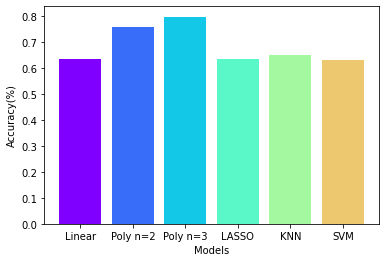

In [273]:
height = [lrac, lm2ac, lm3ac, lsac, knnac,svmac]
bars = ('Linear', 'Poly n=2', 'Poly n=3', 'LASSO', 'KNN','SVM')
y_pos = np.arange(len(bars))
plt.bar(bars, height, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.show()

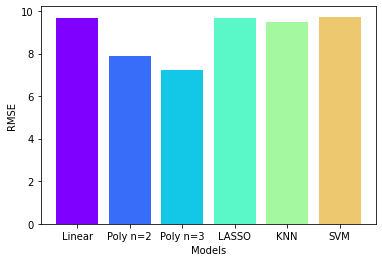

In [274]:
height = [lrrmse, lm2rmse, lm3rmse, lsrmse, knnrmse,svmrmse]
bars = ('Linear', 'Poly n=2', 'Poly n=3', 'LASSO', 'KNN','SVM')
y_pos = np.arange(len(bars))
plt.bar(bars, height, color=colors)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()